In [2]:
import numpy as np
import dask , dask.distributed
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean.cm as cmo
import warnings
warnings.simplefilter('ignore')
import dask_jobqueue
from astropy.convolution import Box2DKernel, convolve

# monthly

In [ ]:
pathf='/gxfs_work/geomar/smomw577/mesoscale_eddies/BOX_filtered/'
dsa=xr.open_dataset(pathf+'3x3_boxfilter_anomaly_monthly.nc')

## linear regression

### SSH corr

In [76]:
sh=dsa.sens_heat
lh=dsa.evap_heat
o2=dsa.o2_stf
dic=dsa.dic_stf
ssh=dsa.SSH
sst=dsa.SST
#ssh=ssh.rename({'xt': 'xt_ocean', 'yt': 'yt_ocean'})
#sst=sst.rename({'xt': 'xt_ocean', 'yt': 'yt_ocean'})
#ssh=ssh.interp_like(dic).compute()
#sst=sst.interp_like(dic).compute()

In [78]:
ssh_sst=xr.corr(ssh, sst, dim='month').compute()

In [79]:
ssh_sh=xr.corr(ssh, sh, dim='month').compute()
ssh_lh=xr.corr(ssh, lh, dim='month').compute()

In [80]:
ssh_o2=xr.corr(ssh, o2, dim='month').compute()
ssh_dic=xr.corr(ssh, dic, dim='month').compute()

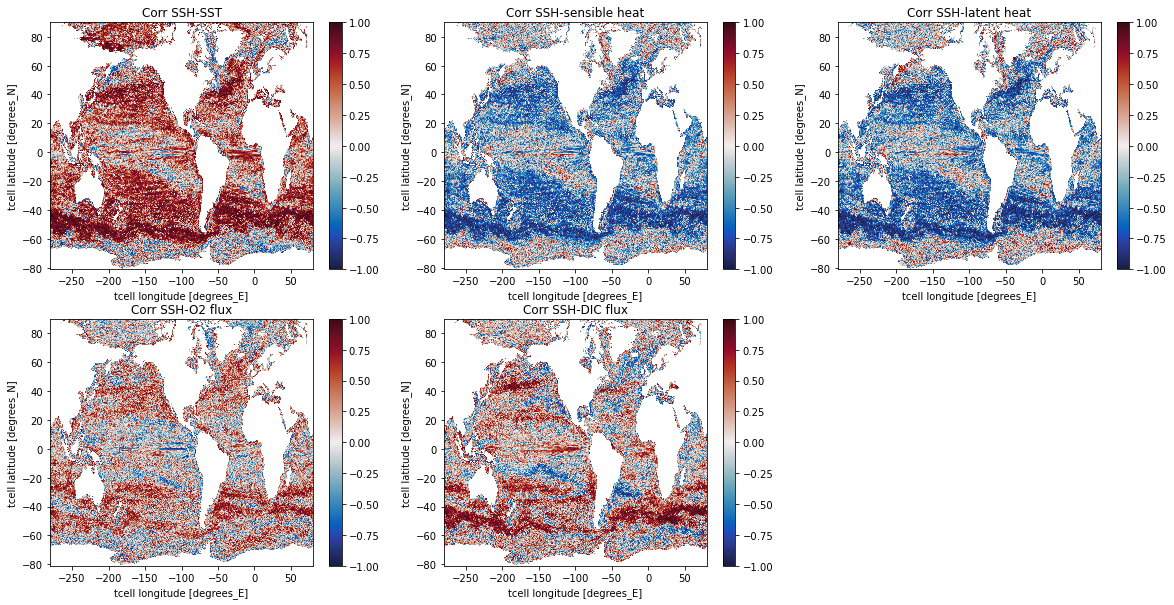

In [86]:
fig, axs= plt.subplots(nrows=2, ncols=3 , figsize=(20,10))
ssh_sst.plot(ax=axs[0,0], vmin=-1, vmax=1, cmap=cmo.balance)
ssh_sh.plot(ax=axs[0,1], vmin=-1, vmax=1, cmap=cmo.balance)
ssh_lh.plot(ax=axs[0,2], vmin=-1, vmax=1, cmap=cmo.balance)
ssh_o2.plot(ax=axs[1,0], vmin=-1, vmax=1, cmap=cmo.balance)
ssh_dic.plot(ax=axs[1,1], vmin=-1, vmax=1, cmap=cmo.balance)
axs[1,2].set_axis_off()

axs[0,0].set_title('Corr SSH-SST');
axs[0,1].set_title('Corr SSH-sensible heat');
axs[0,2].set_title('Corr SSH-latent heat');
axs[1,0].set_title('Corr SSH-O2 flux');
axs[1,1].set_title('Corr SSH-DIC flux');

plt.savefig('/gxfs_home/geomar/smomw577/plots/Boxcar/correlations/3x3_boxcar_global_corr_monthly.png', dpi=300)

#### sensible heat test


In [4]:
sh_lh=xr.corr(sh, lh, dim='month').compute()
sh_o2=xr.corr(sh, o2, dim='month').compute()
sh_dic=xr.corr(sh, dic, dim='month').compute()

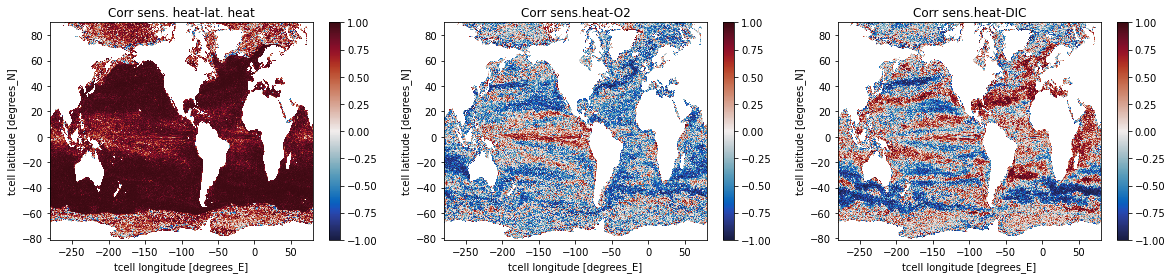

In [9]:
fig, axs= plt.subplots(nrows=1, ncols=3 , figsize=(20,4))
sh_lh.plot(ax=axs[0], vmin=-1, vmax=1, cmap=cmo.balance)
sh_o2.plot(ax=axs[1], vmin=-1, vmax=1, cmap=cmo.balance)
sh_dic.plot(ax=axs[2], vmin=-1, vmax=1, cmap=cmo.balance)
axs[0].set_title('Corr sens. heat-lat. heat')
axs[1].set_title('Corr sens.heat-O2')
axs[2].set_title('Corr sens.heat-DIC')
plt.savefig('/gxfs_home/geomar/smomw577/plots/Boxcar/correlations/3x3_boxcar_global_sh_corr_monthly.png', dpi=300);

### Agulhas region test

In [87]:
ds_interp=xr.merge([sst, ssh, sh, lh, o2, dic])

In [88]:
ds_agulhas=ds_interp.sel(xt_ocean=slice(0,50), yt_ocean=slice(-45,-30))

In [94]:
ag_ssh_sst=xr.corr(ds_agulhas.SSH, ds_agulhas.SST,dim='month')
ag_ssh_sh=xr.corr(ds_agulhas.SSH, ds_agulhas.sens_heat,dim='month')
ag_ssh_lh=xr.corr(ds_agulhas.SSH, ds_agulhas.evap_heat,dim='month')
ag_ssh_dic=xr.corr(ds_agulhas.SSH, ds_agulhas.dic_stf,dim='month')
ag_ssh_o2=xr.corr(ds_agulhas.SSH, ds_agulhas.o2_stf,dim='month')

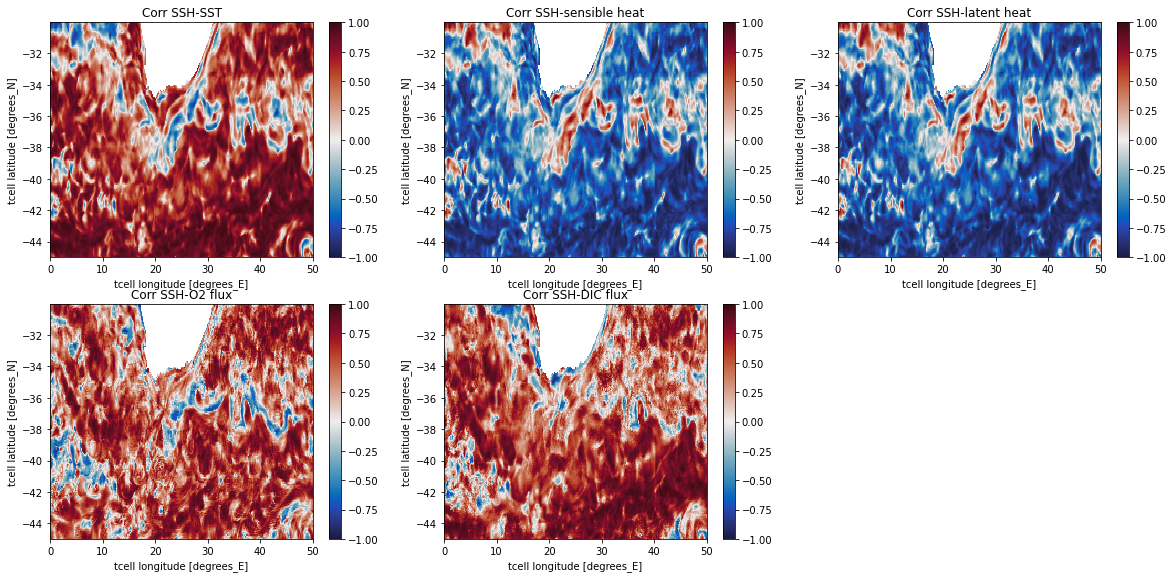

In [95]:
fig, axs= plt.subplots(nrows=2, ncols=3 , figsize=(20,9.5))
ag_ssh_sst.plot(ax=axs[0,0], vmin=-1, vmax=1, cmap=cmo.balance)
ag_ssh_sh.plot(ax=axs[0,1], vmin=-1, vmax=1, cmap=cmo.balance)
ag_ssh_lh.plot(ax=axs[0,2], vmin=-1, vmax=1, cmap=cmo.balance)
ag_ssh_o2.plot(ax=axs[1,0], vmin=-1, vmax=1, cmap=cmo.balance)
ag_ssh_dic.plot(ax=axs[1,1], vmin=-1, vmax=1, cmap=cmo.balance)
axs[1,2].set_axis_off()

axs[0,0].set_title('Corr SSH-SST');
axs[0,1].set_title('Corr SSH-sensible heat');
axs[0,2].set_title('Corr SSH-latent heat');
axs[1,0].set_title('Corr SSH-O2 flux');
axs[1,1].set_title('Corr SSH-DIC flux')
plt.savefig('/gxfs_home/geomar/smomw577/plots/Boxcar/correlations/3x3_boxcar_agulhas_corr_monthly.png', dpi=300);

## month 1


### Agulhas

In [96]:
agday0=ds_agulhas.isel(month=0)

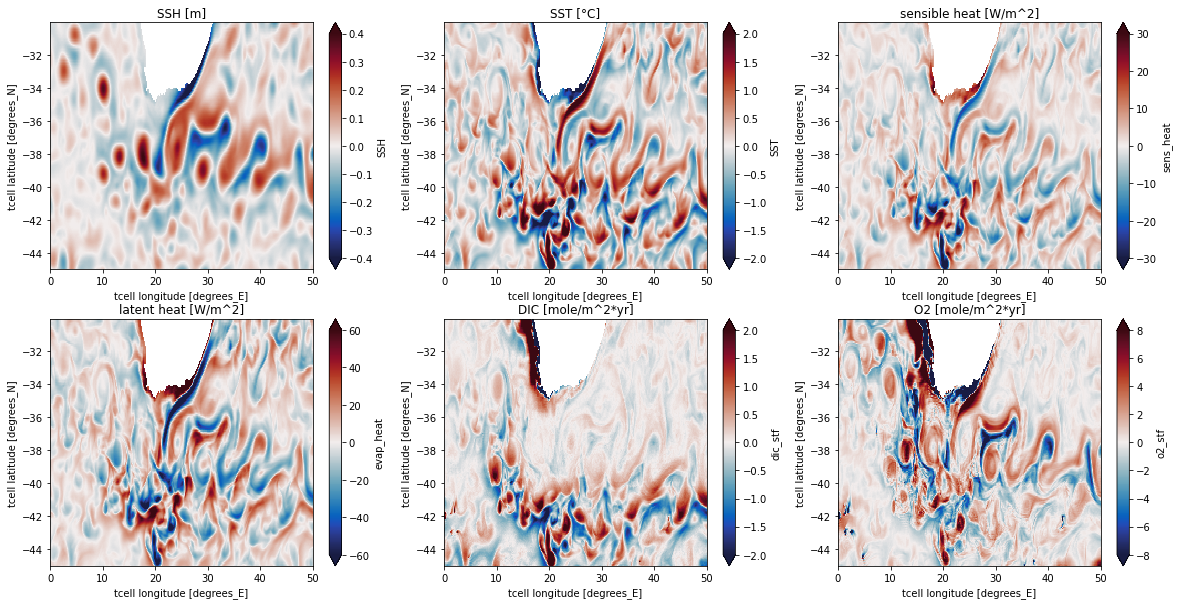

In [102]:
fig, axs= plt.subplots(nrows=2, ncols=3 , figsize=(20,10))
agday0.SSH.plot(ax=axs[0,0], vmin=-0.4, vmax=0.4, cmap=cmo.balance)
agday0.SST.plot(ax=axs[0,1], vmin=-2, vmax=2, cmap=cmo.balance)
(agday0).sens_heat.plot(ax=axs[0,2],vmin=-30, vmax=30, cmap=cmo.balance)
(agday0).evap_heat.plot(ax=axs[1,0],vmin=-60, vmax=60, cmap=cmo.balance)
(agday0).dic_stf.plot(ax=axs[1,1],vmin=-2, vmax=2, cmap=cmo.balance)
(agday0).o2_stf.plot(ax=axs[1,2],vmin=-8, vmax=8, cmap=cmo.balance);

axs[0,0].set_title('SSH [m]');
axs[0,1].set_title('SST [°C]');
axs[0,2].set_title('sensible heat [W/m^2]');
axs[1,0].set_title('latent heat [W/m^2]');
axs[1,1].set_title('DIC [mole/m^2*yr]');
axs[1,2].set_title('O2 [mole/m^2*yr]');

plt.savefig('/gxfs_home/geomar/smomw577/plots/Boxcar/correlations/3x3_boxcar_agulhas_ano_month1.png', dpi=300)

### global

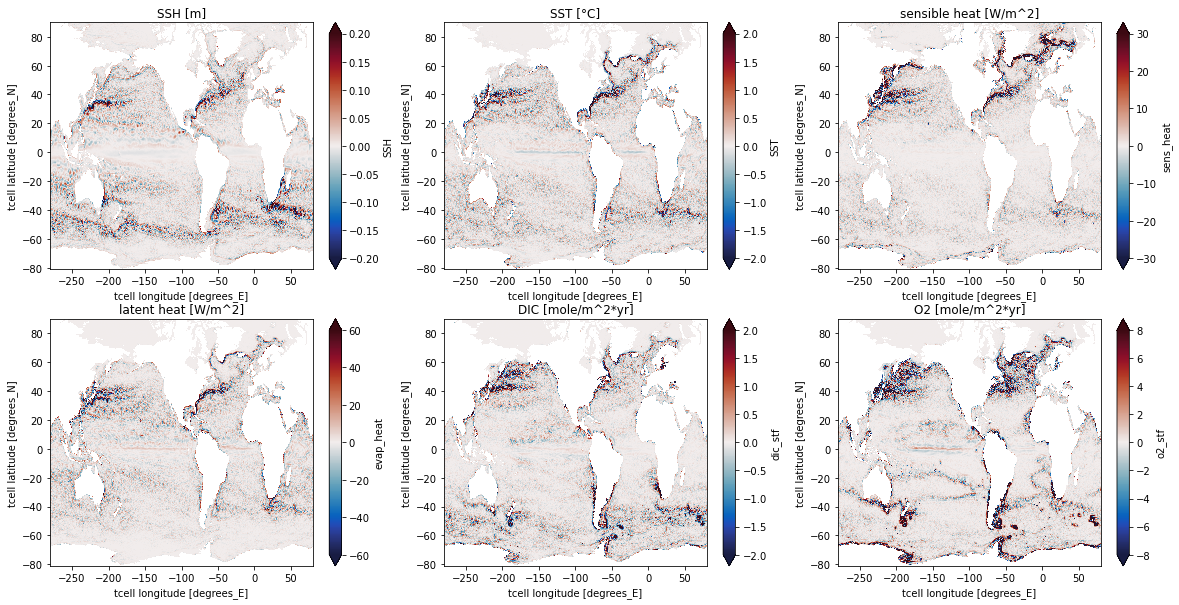

In [103]:
fig, axs= plt.subplots(nrows=2, ncols=3 , figsize=(20,10))
ds_interp.isel(month=0).SSH.plot(ax=axs[0,0], vmin=-0.2, vmax=0.2, cmap=cmo.balance)
ds_interp.isel(month=0).SST.plot(ax=axs[0,1], vmin=-2, vmax=2, cmap=cmo.balance)
(ds_interp.isel(month=0).sens_heat).plot(ax=axs[0,2],vmin=-30, vmax=30, cmap=cmo.balance)
(ds_interp.isel(month=0).evap_heat).plot(ax=axs[1,0],vmin=-60, vmax=60, cmap=cmo.balance)
(ds_interp.isel(month=0).dic_stf).plot(ax=axs[1,1],vmin=-2, vmax=2, cmap=cmo.balance)
(ds_interp.isel(month=0).o2_stf).plot(ax=axs[1,2],vmin=-8, vmax=8, cmap=cmo.balance);

axs[0,0].set_title('SSH [m]');
axs[0,1].set_title('SST [°C]');
axs[0,2].set_title('sensible heat [W/m^2]');
axs[1,0].set_title('latent heat [W/m^2]');
axs[1,1].set_title('DIC [mole/m^2*yr]');
axs[1,2].set_title('O2 [mole/m^2*yr]');

plt.savefig('/gxfs_home/geomar/smomw577/plots/Boxcar/correlations/3x3_boxcar_global_ano_month1.png', dpi=300)

### scatter

In [110]:
def scattering(var, spatial, label, filename): ##var =SST, sens_heat, evap_heat
    corr=np.round(xr.corr(ssh[:, ::spatial, ::spatial], var[:, ::spatial, ::spatial]).values, 2)
    plt.figure(figsize=(12,8))
    plt.grid()
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')

    plt.scatter(ssh[:, ::spatial, ::spatial].values.flatten(), 
                var[:, ::spatial, ::spatial].values.flatten(),
               color='gray', marker='x', label='correlation raw: '+str(corr))
    
    plt.xlabel('SSH [m]', fontsize=20)
    plt.ylabel(label, fontsize=20)
    plt.title('Anomalies', fontsize=23)
    plt.legend(loc=2, fontsize=20)
    plt.savefig('/gxfs_home/geomar/smomw577/plots/Boxcar/scatters/3x3_boxcar_global_scatter_SSH_'+filename+'_monthly.png', dpi=300)


### global

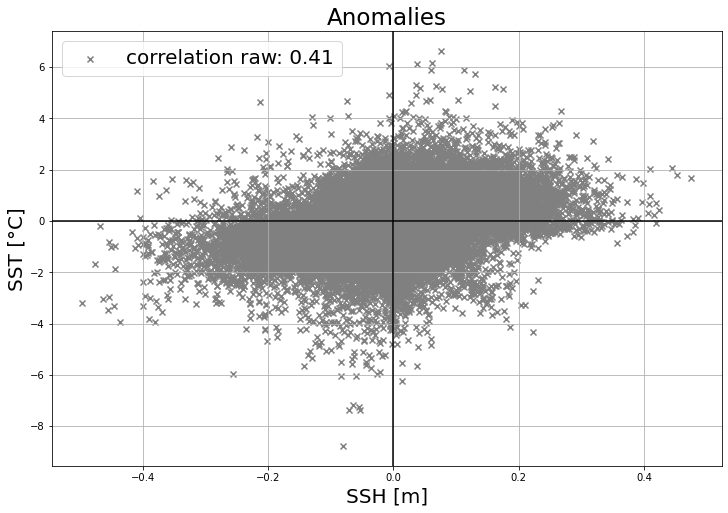

In [109]:
scattering(sst, 10, 'SST [°C]', 'sst')

### Agulhas

In [ ]:
def scattering_ag(var, spatial, label, filename): ##var =SST, sens_heat, evap_heat
    corr=np.round(xr.corr(ds_agulhas.SSH[:, ::spatial, ::spatial], var[:, ::spatial, ::spatial]).values, 2)
    plt.figure(figsize=(12,8))
    plt.grid()
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')

    plt.scatter(ds_agulhas.SSH[:, ::spatial, ::spatial].values.flatten(), 
                var[:, ::spatial, ::spatial].values.flatten(),
               color='gray', marker='x', label='correlation raw: '+str(corr))
    
    plt.xlabel('SSH [m]', fontsize=20)
    plt.ylabel(label, fontsize=20)
    plt.title('Anomalies Agulhas', fontsize=23)
    plt.legend(loc=2, fontsize=20)
    plt.savefig('/gxfs_home/geomar/smomw577/plots/Boxcar/scatters/3x3_boxcar_agulhas_scatter_SSH_'+filename+'_monthly.png', dpi=300)


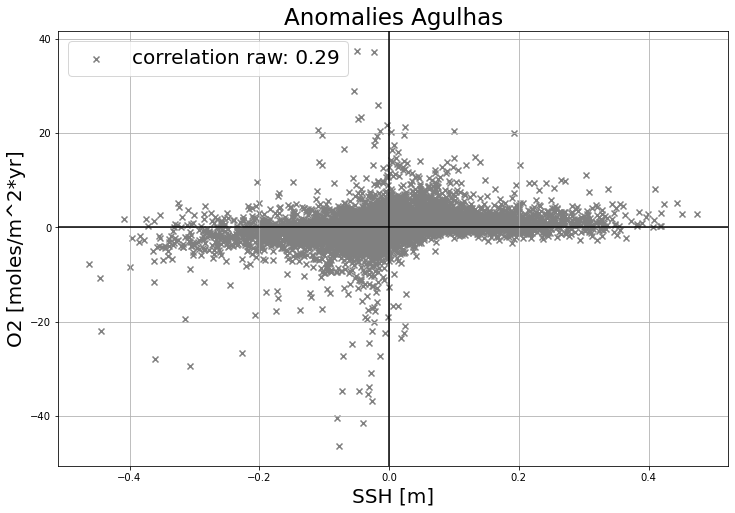

In [115]:
scattering_ag(ds_agulhas.o2_stf, 10, 'O2 [moles/m^2*yr]', 'o2')

### binned

In [93]:
### test SSH SST

In [157]:
ssh_b=xr.DataArray([ssh.values.flatten()], dims=['value','iterate'], name='SSH')
sst_b=xr.DataArray([sst.values.flatten()], dims=['value','iterate'], name='SST')

In [164]:
ssh_sst_b=xr.merge([ssh_b, sst_b])

In [ ]:
ssh_sst_o=ssh_sst_b.notnull()

In [ ]:
ssh_sst_b=ssh_sst_o.groupby_bins('SSH', 10)

# daily

In [3]:
pathf='/gxfs_work/geomar/smomw577/mesoscale_eddies/BOX_filtered/'
dsa=xr.open_dataset(pathf+'3x3_boxfilter_anomaly_daily.nc', chunks={"xt_ocean": 10, "yt_ocean":10})

## linear regression

In [4]:
o2=dsa.o2_stf
dic=dsa.dic_stf
ssh=dsa.SSH
sst=dsa.SST

In [ ]:
###!!!!takes some time
ssh_sst=xr.corr(ssh, sst, dim='time').compute()
ssh_o2=xr.corr(ssh, o2, dim='time').compute()
ssh_dic=xr.corr(ssh, dic, dim='time').compute()

In [ ]:
### save correlation maps, because it takes a while to compute
correlations=[ssh_sst,ssh_o2, ssh_dic]
correlations.to_netcdf('/gxfs_work/geomar/smomw577/mesoscale_eddies/BOX_filtered/3x3_boxfilter_ssh_correlations_daily.nc')

In [ ]:
### ignore the previous two cells if already computed
correlations=xr.open_dataset('/gxfs_work/geomar/smomw577/mesoscale_eddies/BOX_filtered/3x3_boxfilter_ssh_correlations_daily.nc')

In [ ]:
fig, axs= plt.subplots(nrows=1, ncols=3 , figsize=(20,6))
ssh_sst.plot(ax=axs[0], vmin=-1, vmax=1, cmap=cmo.balance)
ssh_o2.plot(ax=axs[1], vmin=-1, vmax=1, cmap=cmo.balance)
ssh_dic.plot(ax=axs[2], vmin=-1, vmax=1, cmap=cmo.balance)

axs[0].set_title('Corr SSH-SST');
axs[1].set_title('Corr SSH-O2');
axs[2].set_title('Corr SSH-DIC');

plt.savefig('/gxfs_home/geomar/smomw577/plots/Boxcar/correlations/3x3_boxcar_global_corr_daily.png', dpi=300)